In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [3]:
# properties = pd.read_csv('Data/properties_2016.csv')
# train = pd.read_csv("Data/train_2016_v2.csv")

In [4]:
# properties.to_pickle('properties')
# train.to_pickle('train')

In [2]:
properties = pd.read_pickle('Data/properties')
train = pd.read_pickle('Data/train')

In [3]:
if len(properties.parcelid.unique()) == properties.shape[0]:
    print('Every row corresponds to a unique property.')
else:
    print('Some rows contain data on the same parcel.')

Every row corresponds to a unique property.


In [41]:
# samp = properties.sample(n=500)

In [45]:
tax_value = properties['landtaxvaluedollarcnt'].dropna()
# sns.distplot()

In [50]:
tv = tax_value[tax_value<1000000]

(array([ 927766.,  750258.,  483144.,  290376.,  168266.,   98511.,
          56395.,   33607.,   22078.,   16008.]),
 array([  1.00000000e+00,   1.00000600e+05,   2.00000200e+05,
          2.99999800e+05,   3.99999400e+05,   4.99999000e+05,
          5.99998600e+05,   6.99998200e+05,   7.99997800e+05,
          8.99997400e+05,   9.99997000e+05]),
 <a list of 10 Patch objects>)

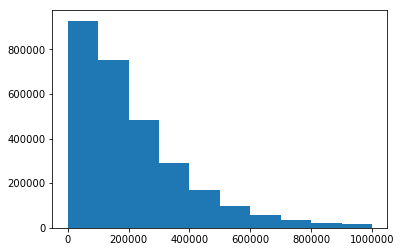

In [51]:
plt.hist(tv)

In [7]:
if len(properties.parcelid.unique()) == properties.shape[0]:
    print('Every row corresponds to a unique property.')
else:
    print('Some rows contain data on the same parcel.')

Every row corresponds to a unique property.


In [8]:
# code taken from:
# https://www.kaggle.com/infinitewing/xgboost-without-outliers-lb-0-06463

In [9]:

for c in properties.columns:
    properties[c]=properties[c].fillna(-1)
    if properties[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(properties[c].values))
        properties[c] = lbl.transform(list(properties[c].values))

In [57]:
properties.sort_values(by='parcelid').head(5)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
563784,10711725,1.0,-1.0,-1.0,3.0,4.0,-1.0,4.0,3.0,-1.0,...,-1.0,0,183000.0,615000.0,2015.0,432000.0,8625.75,0,-1.0,6.037113e+13
1218111,10711726,1.0,-1.0,-1.0,3.0,5.0,-1.0,4.0,3.0,-1.0,...,-1.0,0,217167.0,531642.0,2015.0,314475.0,6722.67,0,-1.0,6.037113e+13
1783611,10711727,1.0,-1.0,-1.0,2.0,4.0,-1.0,4.0,2.0,-1.0,...,-1.0,0,195295.0,328148.0,2015.0,132853.0,4160.63,0,-1.0,6.037113e+13
2348091,10711728,1.0,-1.0,-1.0,3.0,4.0,-1.0,4.0,3.0,-1.0,...,-1.0,0,188384.0,297377.0,2015.0,108993.0,3883.47,0,-1.0,6.037113e+13
2912833,10711729,1.0,-1.0,-1.0,3.0,4.0,-1.0,4.0,3.0,-1.0,...,-1.0,0,178238.0,297001.0,2015.0,118763.0,3884.27,0,-1.0,6.037113e+13


In [11]:
train_df = train.merge(properties, how='left', on='parcelid')
x_train = train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
x_test = properties.drop(['parcelid'], axis=1)
# shape        
print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))

Shape train: (90275, 57)
Shape test: (2985217, 57)


In [13]:
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,-1.0,-1.0,2.0,3.0,-1.0,4.0,...,-1.0,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,-1.0,6.037107e+13
1,14366692,-0.1684,2016-01-01,-1.0,-1.0,-1.0,3.5,4.0,-1.0,-1.0,...,-1.0,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,-1.0,-1.000000e+00
2,12098116,-0.0040,2016-01-01,1.0,-1.0,-1.0,3.0,2.0,-1.0,4.0,...,-1.0,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,-1.0,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,-1.0,-1.0,2.0,2.0,-1.0,4.0,...,-1.0,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,-1.0,6.037296e+13
4,14432541,-0.0050,2016-01-02,-1.0,-1.0,-1.0,2.5,4.0,-1.0,-1.0,...,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,-1.0,6.059042e+13


In [42]:
train_df["transactiondate"] = pd.to_datetime(train_df["transactiondate"])

In [43]:
train_df["Month"] = train_df["transactiondate"].dt.month
# we know month of sold transactions in training. this could be useful for predictions, because we know 
# the month we are trying to predict in

In [14]:


# drop out ouliers
train_df=train_df[ train_df.logerror > -0.4 ]
train_df=train_df[ train_df.logerror < 0.4 ]
x_train=train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
y_train = train_df["logerror"].values.astype(np.float32)
y_mean = np.mean(y_train)

In [15]:


print('After removing outliers:')     
print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))


After removing outliers:
Shape train: (88431, 57)
Shape test: (2985217, 57)


In [16]:


# xgboost params
xgb_params = {
    'eta': 0.06,
    'max_depth': 5,
    'subsample': 0.75,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'base_score': y_mean,
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

In [19]:


# cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   nfold=5,
                   num_boost_round=200,
                   early_stopping_rounds=50,
                   verbose_eval=10, 
                   show_stdv=False
                  )
num_boost_rounds = len(cv_result)
print(num_boost_rounds)

[0]	train-mae:0.0528386	test-mae:0.0528544
[10]	train-mae:0.0523968	test-mae:0.052548
[20]	train-mae:0.0521704	test-mae:0.0524374
[30]	train-mae:0.0520186	test-mae:0.0523884
[40]	train-mae:0.0518978	test-mae:0.0523588
[50]	train-mae:0.0517832	test-mae:0.052342
[60]	train-mae:0.0516956	test-mae:0.0523326
[70]	train-mae:0.0516092	test-mae:0.0523308
[80]	train-mae:0.0515338	test-mae:0.0523336
[90]	train-mae:0.051463	test-mae:0.0523304
[100]	train-mae:0.0513914	test-mae:0.0523352
[110]	train-mae:0.0513184	test-mae:0.0523292
[120]	train-mae:0.0512506	test-mae:0.0523286
[130]	train-mae:0.0511882	test-mae:0.0523248
[140]	train-mae:0.0511168	test-mae:0.0523308
[150]	train-mae:0.0510542	test-mae:0.0523354
[160]	train-mae:0.0509854	test-mae:0.0523328
[170]	train-mae:0.0509212	test-mae:0.0523392
[180]	train-mae:0.0508556	test-mae:0.0523386
134


In [22]:
# train model
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)
pred = model.predict(dtest)
y_pred=[]

In [23]:
for i,predict in enumerate(pred):
    y_pred.append(str(round(predict,4)))

In [28]:
y_pred=np.array(y_pred)

In [29]:


output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
        '201610': y_pred, '201611': y_pred, '201612': y_pred,
        '201710': y_pred, '201711': y_pred, '201712': y_pred})

In [30]:
output.head()

,201610,201611,201612,201710,201711,201712,ParcelId
0,-0.0314,-0.0314,-0.0314,-0.0314,-0.0314,-0.0314,10754147
1,0.0115,0.0115,0.0115,0.0115,0.0115,0.0115,10759547
2,0.0398,0.0398,0.0398,0.0398,0.0398,0.0398,10843547
3,0.0726,0.0726,0.0726,0.0726,0.0726,0.0726,10859147
4,0.0485,0.0485,0.0485,0.0485,0.0485,0.0485,10879947


In [32]:

# set col 'ParceID' to first col
cols = output.columns.tolist()

In [33]:
cols

['201610', '201611', '201612', '201710', '201711', '201712', 'ParcelId']

In [39]:
cols = cols[-1:] + cols[:-1]
cols

['ParcelId', '201610', '201611', '201612', '201710', '201711', '201712']

In [40]:
output = output[cols]

In [41]:
output.to_csv('sub{}.csv'.format(datetime.now().strftime('%Y%_m_%d_%H:%M:%S')), index=False)